In [235]:
import numpy as np
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import seaborn as sns

In [129]:
df_500 = pd.read_csv('sp500_tickers.csv')
df_500.head()

,Ticker,Name,Industry,Sub-Industry,IPO Date
0,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1957-03-04
3,ABBV,AbbVie,Health Care,Biotechnology,2012-12-31
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,2011-07-06


In [130]:
tickers = df_500['Ticker'].tolist()  # Ticker listesi
ticker_corr = {}

# S&P 500 endeksinin kapanış fiyatlarını çekiyoruz
sp_close = yf.Ticker("SPY").history(start="2020-01-01", end="2025-01-01")['Close']

# S&P 500'ün günlük yüzde değişimini hesaplıyoruz
sp_pct_change = sp_close.pct_change().dropna()

# Her bir şirketin yüzde değişimini hesaplıyoruz ve korelasyonu alıyoruz
for ticker in tickers:
    try:
        # Şirketin kapanış fiyatını çekiyoruz
        data = yf.Ticker(ticker).history(start="2020-01-01", end="2025-01-01")['Close']
        
        # Şirketin günlük yüzde değişimini hesaplıyoruz
        pct_change = data.pct_change().dropna()
        
        # Korelasyonu hesaplıyoruz
        correlation = sp_pct_change.corr(pct_change)
        print(f"{ticker} correlation with SP500 is {correlation}")
        ticker_corr[ticker] = correlation
    except Exception as e:
        print(f"Error for {ticker}: {e}")
        continue

MMM correlation with SP500 is 0.5631746301288701
AOS correlation with SP500 is 0.578911439199818
ABT correlation with SP500 is 0.6143647919792897
ABBV correlation with SP500 is 0.45828842341618037
ACN correlation with SP500 is 0.7735061807047415
ADBE correlation with SP500 is 0.6900036522135176
AMD correlation with SP500 is 0.6350304923717208
AES correlation with SP500 is 0.5870505489036131
AFL correlation with SP500 is 0.6330224334476665
A correlation with SP500 is 0.6809592419079812
APD correlation with SP500 is 0.6244469085980728
ABNB correlation with SP500 is 0.5269178743317671
AKAM correlation with SP500 is 0.49101298624998607
ALB correlation with SP500 is 0.5372847268705843
ARE correlation with SP500 is 0.6557223672527059
ALGN correlation with SP500 is 0.6030882791225978
ALLE correlation with SP500 is 0.7082237767405015
LNT correlation with SP500 is 0.5354472210159504
ALL correlation with SP500 is 0.5796469991561359
GOOGL correlation with SP500 is 0.7445873884191904
GOOG correlat

BRK.B: No timezone found, symbol may be delisted


BRK.B correlation with SP500 is nan
BBY correlation with SP500 is 0.6063486813262962
TECH correlation with SP500 is 0.5373233003305409
BIIB correlation with SP500 is 0.3719409517418259
BLK correlation with SP500 is 0.8086558927251374
BX correlation with SP500 is 0.7551731067151847
BK correlation with SP500 is 0.680368724696484
BA correlation with SP500 is 0.6035184843723423
BKNG correlation with SP500 is 0.6525981735106445
BWA correlation with SP500 is 0.5840776596395698
BSX correlation with SP500 is 0.664895403049117
BMY correlation with SP500 is 0.41295350282721466
AVGO correlation with SP500 is 0.7038843975068747
BR correlation with SP500 is 0.6962617130193622
BRO correlation with SP500 is 0.700270577181706


BF.B: No price data found, symbol may be delisted (1d 2020-01-01 -> 2025-01-01)


BF.B correlation with SP500 is nan
BLDR correlation with SP500 is 0.6374565934086156
BG correlation with SP500 is 0.49486178284714766
BXP correlation with SP500 is 0.597254231339801
CHRW correlation with SP500 is 0.43095170512638153
CDNS correlation with SP500 is 0.72467749156246
CZR correlation with SP500 is 0.6157405298517733
CPT correlation with SP500 is 0.6260562310851278
CPB correlation with SP500 is 0.22509897604320075
COF correlation with SP500 is 0.6872438281573985
CAH correlation with SP500 is 0.5038917753013201
KMX correlation with SP500 is 0.5896218025434444
CCL correlation with SP500 is 0.5563087640289135
CARR correlation with SP500 is 0.49603887710661476
CAT correlation with SP500 is 0.6271880256124558
CBOE correlation with SP500 is 0.42482037240276416
CBRE correlation with SP500 is 0.6818954517366332
CDW correlation with SP500 is 0.7442051893415094
CE correlation with SP500 is 0.6432722860296038
COR correlation with SP500 is 0.5358291889521021
CNC correlation with SP500 i

KeyboardInterrupt: 

In [38]:
df_t = pd.DataFrame(list(ticker_corr.items()), columns=['Ticker', 'Value'])

df_t.sort_values(by='Value', ascending=False, inplace=True)

In [39]:
top20 = set(df_t[:20]['Ticker'].str.lower().tolist())

In [40]:
# get the top 20 company from by their market cap from https://stockanalysis.com/list/biggest-companies/

import requests
url = 'https://stockanalysis.com/list/biggest-companies/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
rows = table.find_all('tr')
# to dataframe
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)
df = pd.DataFrame(data, columns=['Rank', 'Symbol', 'Company', 'Market Cap', 'Price', 'Change', 'Volume'])
df['Symbol'] = df['Symbol'].str.replace('.', '-')

top_tickers = set(df[:20]['Symbol'].str.lower().to_list()) | top20



In [41]:
top_tickers

{'aapl',
 'acn',
 'adi',
 'ame',
 'amp',
 'amzn',
 'aph',
 'avgo',
 'blk',
 'brk-b',
 'cost',
 'dov',
 'googl',
 'hd',
 'intu',
 'itw',
 'jpm',
 'lly',
 'ma',
 'mco',
 'meta',
 'msft',
 'nvda',
 'orcl',
 'payx',
 'ph',
 'spgi',
 'tel',
 'trow',
 'tsla',
 'tsm',
 'txn',
 'unh',
 'v',
 'wmt',
 'xom'}

In [ ]:
tickers_to_remove = ['tel', 'trow', 'tsm', 'txn', 'wmt', 'unh', 'msft', 'nvda', 'payx', 'spgi', 'meta', 'lly', 'itw', 'intu', 'hd', 'googl', 'cost', 'brk-b', 'avgo', 'amzn', 'amp', 'ame']
for ticker in tickers_to_remove:
	top_tickers.remove(ticker)

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt
import pandas as pd

# Initialize an empty list to hold news data
news_data = []



for ticker in top_tickers:
    datetime_parsed = dt.today()  # Current datetime for each ticker
    for i in range(1, 500):  # Loop through pagination
        url = f'https://markets.businessinsider.com/news/{ticker}-stock?p={i}'
        response = requests.get(url)

        # Parse the page content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the news story section
        news_story = soup.find_all('div', class_='latest-news__story')

        for story in news_story:
            # Extract the source
            source = story.find('span', class_='latest-news__source').text.strip()

            # Extract the datetime
            datetime_str = story.find('time', class_='latest-news__date')['datetime']
            # Try different datetime formats
            for fmt in ('%Y-%m-%dT%H:%M:%S%z', '%m/%d/%Y %I:%M:%S %p'):
                try:
                    datetime_parsed = dt.strptime(datetime_str, fmt)  # Store parsed datetime separately
                    break
                except ValueError:
                    continue
            else:
                print(f"Error parsing date: {datetime_str}")
                continue

            # Extract the news title
            title = story.find(class_='news-link').text.strip()

            # Add the extracted information to the list
            news_data.append({
                'Ticker': ticker,
                'Title': title,
                'Datetime': datetime_parsed,
                'Source': source
            })

            # Print data for debugging (optional)
         
        # Break the inner loop if a news article is older than January 1, 2023
        if datetime_parsed < dt(2020, 1, 1):
            break
        if i % 10 == 0:
            print(f"Page {i} for {ticker}")
            time.sleep(1)  # Optional: Pause to avoid overloading the server

    # After collecting all the data for the ticker, create a DataFrame and save to CSV
    df_news = pd.DataFrame(news_data)
    df_news.to_csv(f'./news/news_{ticker}.csv', index=False)

    # Clear the list for the next ticker
    news_data.clear()




Page 10 for blk
Page 20 for blk
Page 30 for blk
Page 40 for blk
Page 50 for blk
Page 60 for blk
Page 70 for blk
Page 80 for blk
Page 90 for blk
Page 100 for blk
Page 110 for blk
Page 120 for blk
Page 130 for blk
Page 140 for blk
Page 150 for blk
Page 160 for blk
Page 170 for blk
Page 180 for blk
Page 190 for blk
Page 200 for blk
Page 210 for blk
Page 220 for blk
Page 230 for blk
Page 240 for blk
Page 250 for blk
Page 260 for blk
Page 270 for blk
Page 280 for blk
Page 290 for blk
Page 300 for blk
Page 310 for blk
Page 320 for blk
Page 330 for blk
Page 340 for blk
Page 350 for blk
Page 360 for blk
Page 370 for blk
Page 380 for blk
Page 390 for blk
Page 400 for blk
Page 410 for blk
Page 420 for blk
Page 430 for blk
Page 440 for blk
Page 450 for blk
Page 460 for blk
Page 470 for blk
Page 480 for blk
Page 490 for blk
Page 10 for jpm
Page 20 for jpm
Page 30 for jpm
Page 40 for jpm
Page 50 for jpm
Page 60 for jpm
Page 70 for jpm
Page 10 for ma
Page 20 for ma
Page 30 for ma
Page 10 for acn
Pag

In [68]:
import os 
print(os.getcwd()) 
df_news = pd.DataFrame(columns=['Ticker', 'Title', 'Datetime', 'Source'])
# get all the cvs files in the news folder
files = os.listdir('./news')
print(files)
# read all the files and append them to a single dataframe
for file in files:
    df_tepm = pd.read_csv(f'./news/{file}', encoding='ISO-8859-1', index_col=None)
    df_news = pd.concat([df_news, df_tepm], axis=0)



/Users/emreyuce/Desktop/Springboard/stock
['news_nvda.csv', 'news_wmt.csv', 'news_msft.csv', 'news_dov.csv', '.DS_Store', 'news_intu.csv', 'news_orcl.csv', 'news_ma.csv', 'news_unh.csv', 'news_googl.csv', 'news_amzn.csv', 'news_jpm.csv', 'news_cost.csv', 'news_itw.csv', 'news_mco.csv', 'news_trow.csv', 'news_ph.csv', 'news_brk-b.csv', 'news_ame.csv', 'news_acn.csv', 'news_xom.csv', 'news_amp.csv', 'news_aapl.csv', 'news_hd.csv', 'news_avgo.csv', 'news_txn.csv', 'news_meta.csv', 'news_adi.csv', 'news_payx.csv', 'news_lly.csv', 'news_v.csv', 'news_tsm.csv', 'news_tsla.csv', 'news_spgi.csv', 'news_aph.csv']


In [69]:
df_news.head()

,Ticker,Title,Datetime,Source,Unnamed: 0
0,nvda,AI Daily: White House order opens federal land...,2025-01-15 18:55:23,TipRanks,NaN
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",2025-01-15 16:54:45,Seeking Alpha,NaN
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,2025-01-15 16:19:15,Seeking Alpha,NaN
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,2025-01-15 14:05:49,TipRanks,NaN
4,nvda,Notable open interest changes for January 15th,2025-01-15 14:01:35,TipRanks,NaN


In [70]:
df_news.drop(columns='Unnamed: 0', inplace=True)

In [71]:
df_news.isna().sum()

Ticker      0
Title       0
Datetime    0
Source      0
dtype: int64

In [ ]:
df_news[df_news.duplicated(subset=['Title'])].value_counts()

Ticker  Title                                                                              Datetime             Source       
msft    Microsoft announces 2021 Partner of the Year Awards winners and finalists          2021-07-08 19:00:00  PR Newswire      3
cost    Wall Street Favorites: 7 Dividend Stocks With Strong Buy Ratings for January 2024  2024-02-01 11:20:00  InvestorPlace    2
v       Visa, Mastercard to post earnings this week â here's what to expect              2024-10-28 16:22:57  Seeking Alpha    2
tsla    7 Best Infrastructure Stocks to Buy Now                                            2022-06-29 10:05:01  InvestorPlace    2
aapl    9 Up-and-Coming Small-Cap Stocks to Watch                                          2020-01-14 17:06:24  InvestorPlace    2
                                                                                                                                ..
avgo    NVIDIA To $170; Also Check Out Some Other Major PT Changes                      

In [90]:
df_news.drop_duplicates(subset=['Title'], inplace=True)

In [91]:
df_news.duplicated().sum()

0

In [92]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from typing import Tuple 
device = "cuda:0" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").to(device)
labels = ["positive", "negative", "neutral"]

def estimate_sentiment(news):
    tokens = tokenizer(news, return_tensors="pt", padding=True).to(device)

    result = model(tokens["input_ids"], attention_mask=tokens["attention_mask"])[
        "logits"
    ]
    result = torch.nn.functional.softmax(torch.sum(result, 0), dim=-1)
    probability = result
    
    return probability.tolist()

In [93]:
def weighted_average(sentiment_probs, weights):
    """
    sentiment_probs: A list or tensor with probabilities for [positive, negative, neutral] classes.
    weights: A list or tensor with corresponding weights for [positive, negative, neutral] classes.
    
    Returns the weighted average sentiment score.
    """
    # Ensure inputs are numpy arrays for calculation
    sentiment_probs = np.array(sentiment_probs)
    weights = np.array(weights)
    
    # Calculate the weighted average
    weighted_avg = np.sum(sentiment_probs * weights)
    
    return weighted_avg

In [94]:
df_news['sentiment_score'] = df_news['Title'].apply(lambda x: weighted_average(estimate_sentiment(x), [0.5,-0.5, 0.2]))
df_news.to_csv("news_table.csv")

In [201]:
df_news = pd.read_csv("news_table.csv", index_col=0)

In [202]:
df_news.head()

,Ticker,Title,Datetime,Source,sentiment_score
0,nvda,AI Daily: White House order opens federal land...,2025-01-15 18:55:23,TipRanks,0.217707
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",2025-01-15 16:54:45,Seeking Alpha,0.222066
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,2025-01-15 16:19:15,Seeking Alpha,-0.347454
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,2025-01-15 14:05:49,TipRanks,0.200164
4,nvda,Notable open interest changes for January 15th,2025-01-15 14:01:35,TipRanks,0.169178


In [203]:
df_news['Datetime'] = pd.to_datetime(df_news['Datetime'])

In [204]:
df_news['Date'] = df_news['Datetime'].dt.date
df_news['time'] = df_news['Datetime'].dt.time

In [205]:
df_news.head()

,Ticker,Title,Datetime,Source,sentiment_score,Date,time
0,nvda,AI Daily: White House order opens federal land...,2025-01-15 18:55:23,TipRanks,0.217707,2025-01-15,18:55:23
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",2025-01-15 16:54:45,Seeking Alpha,0.222066,2025-01-15,16:54:45
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,2025-01-15 16:19:15,Seeking Alpha,-0.347454,2025-01-15,16:19:15
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,2025-01-15 14:05:49,TipRanks,0.200164,2025-01-15,14:05:49
4,nvda,Notable open interest changes for January 15th,2025-01-15 14:01:35,TipRanks,0.169178,2025-01-15,14:01:35


In [206]:
# create a column for in-hours and after hours
# in hours true if the time is between 9:30 and 16:00
df_news['after_hours'] = df_news['time'].apply(lambda x: x > pd.to_datetime('16:00:00').time())

In [207]:
df_news.head()


,Ticker,Title,Datetime,Source,sentiment_score,Date,time,after_hours
0,nvda,AI Daily: White House order opens federal land...,2025-01-15 18:55:23,TipRanks,0.217707,2025-01-15,18:55:23,True
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",2025-01-15 16:54:45,Seeking Alpha,0.222066,2025-01-15,16:54:45,True
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,2025-01-15 16:19:15,Seeking Alpha,-0.347454,2025-01-15,16:19:15,True
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,2025-01-15 14:05:49,TipRanks,0.200164,2025-01-15,14:05:49,False
4,nvda,Notable open interest changes for January 15th,2025-01-15 14:01:35,TipRanks,0.169178,2025-01-15,14:01:35,False


In [208]:
df_news.drop(columns=['Datetime'], inplace=True)

In [209]:
df_news.head()

,Ticker,Title,Source,sentiment_score,Date,time,after_hours
0,nvda,AI Daily: White House order opens federal land...,TipRanks,0.217707,2025-01-15,18:55:23,True
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",Seeking Alpha,0.222066,2025-01-15,16:54:45,True
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,Seeking Alpha,-0.347454,2025-01-15,16:19:15,True
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,TipRanks,0.200164,2025-01-15,14:05:49,False
4,nvda,Notable open interest changes for January 15th,TipRanks,0.169178,2025-01-15,14:01:35,False


In [210]:
# findout weekends and holidays
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2020-01-01', end='2025-01-01').to_pydatetime()

# use holidays and weekends to create a column for market open
df_news['market_open'] = df_news['Date'].apply(lambda x: x not in holidays and x.weekday() < 5)
#name the day of the week
df_news['day_name'] = df_news['Date'].apply(lambda x: x.strftime('%A'))

df_news.head()



,Ticker,Title,Source,sentiment_score,Date,time,after_hours,market_open,day_name
0,nvda,AI Daily: White House order opens federal land...,TipRanks,0.217707,2025-01-15,18:55:23,True,True,Wednesday
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",Seeking Alpha,0.222066,2025-01-15,16:54:45,True,True,Wednesday
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,Seeking Alpha,-0.347454,2025-01-15,16:19:15,True,True,Wednesday
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,TipRanks,0.200164,2025-01-15,14:05:49,False,True,Wednesday
4,nvda,Notable open interest changes for January 15th,TipRanks,0.169178,2025-01-15,14:01:35,False,True,Wednesday


In [211]:
df_news.drop(columns=['time'], inplace=True)
# if afte_hours shift the date to the next day
df_news['Date'] = df_news.apply(lambda x: (x['Date'] + pd.DateOffset(days=1)).date() if x['after_hours'] else x['Date'], axis=1)
df_news[df_news['after_hours']]

,Ticker,Title,Source,sentiment_score,Date,after_hours,market_open,day_name
0,nvda,AI Daily: White House order opens federal land...,TipRanks,0.217707,2025-01-16,True,True,Wednesday
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",Seeking Alpha,0.222066,2025-01-16,True,True,Wednesday
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,Seeking Alpha,-0.347454,2025-01-16,True,True,Wednesday
6,nvda,Is It Time to Turn Bullish on IONQ Stock after...,TipRanks,0.137656,2025-01-15,True,True,Tuesday
7,nvda,White House issues order opening federal land ...,TipRanks,0.213534,2025-01-15,True,True,Tuesday
...,...,...,...,...,...,...,...,...
267,aph,Amphenol Corporation -- Moody's announces comp...,Moodys,0.209225,2020-04-22,True,True,Tuesday
280,aph,3 Consumer Stocks Loading up on Marijuana,InvestorPlace,0.347680,2019-07-03,True,True,Tuesday
291,aph,The maker of Marlboro cigarettes is reportedly...,Business Insider,0.222919,2018-10-11,True,True,Wednesday
292,aph,Amphenol Technologies Holding GmbH -- Moody's ...,Moodys,0.258053,2018-09-20,True,True,Wednesday


In [212]:
# if market closed shift the date to the next day till there is no market is closed
while df_news[df_news['market_open'] == False].shape[0] > 0:
    df_news['Date'] = df_news.apply(lambda x: x['Date'] + pd.DateOffset(days=1) if x['market_open'] == False else x['Date'], axis=1)
    df_news['market_open'] = df_news['Date'].apply(lambda x: x not in holidays and x.weekday() < 5)

In [213]:
df_news['daty_name'] = df_news['Date'].apply(lambda x: x.strftime('%A'))
df_news.drop(columns=['after_hours'], inplace=True)

df_news.head()


,Ticker,Title,Source,sentiment_score,Date,market_open,day_name,daty_name
0,nvda,AI Daily: White House order opens federal land...,TipRanks,0.217707,2025-01-16,True,Wednesday,Thursday
1,nvda,"Broadcom, Marvell, Nvidia among Oppenheimer's ...",Seeking Alpha,0.222066,2025-01-16,True,Wednesday,Thursday
2,nvda,Rigetti Computing CEO says 'we have to tamp do...,Seeking Alpha,-0.347454,2025-01-16,True,Wednesday,Thursday
3,nvda,Nvidia to host first Quantum Day at GTC 2025 o...,TipRanks,0.200164,2025-01-15,True,Wednesday,Wednesday
4,nvda,Notable open interest changes for January 15th,TipRanks,0.169178,2025-01-15,True,Wednesday,Wednesday


In [214]:
df_news.drop(columns=['day_name'], inplace=True)
df_news.rename(columns={'daty_name':'day_name'}, inplace=True)

In [215]:
df_news.day_name.value_counts()

day_name
Tuesday      17976
Thursday     16912
Wednesday    16817
Monday       15809
Friday       15560
Name: count, dtype: int64

In [216]:
df_news.head(1)

,Ticker,Title,Source,sentiment_score,Date,market_open,day_name
0,nvda,AI Daily: White House order opens federal land...,TipRanks,0.217707,2025-01-16,True,Thursday


In [217]:
df_news['Date'] = pd.to_datetime(df_news['Date'])


df_news = df_news[df_news['Date']>='2020-01-01']
df_news_daily_byticker = df_news.groupby(['Date', 'Ticker'])['sentiment_score'].mean().reset_index().sort_values(by='Date')

In [218]:
df_news_daily_byticker.head()

,Date,Ticker,sentiment_score
0,2020-01-01,aapl,0.281213
1,2020-01-01,googl,0.149723
2,2020-01-01,jpm,0.219975
3,2020-01-01,msft,-0.004162
4,2020-01-01,nvda,-0.391831


In [219]:
# pivot df_news_daily_byticker to have each day as a row and each ticker as a column
df_pivot = df_news_daily_byticker.pivot(index='Date', columns='Ticker', values='sentiment_score').reset_index()

In [220]:
df_pivot

Ticker,Date,aapl,acn,adi,ame,amp,amzn,aph,avgo,brk-b,...,ph,spgi,trow,tsla,tsm,txn,unh,v,wmt,xom
0,2020-01-01,0.281213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.056483,NaN,NaN,0.222316,NaN,NaN,NaN
1,2020-01-02,0.182785,NaN,NaN,NaN,NaN,0.365399,NaN,NaN,NaN,...,NaN,NaN,NaN,0.317294,NaN,NaN,NaN,NaN,0.436396,NaN
2,2020-01-03,0.224765,NaN,NaN,NaN,NaN,0.206689,NaN,NaN,0.234397,...,NaN,NaN,NaN,0.068317,NaN,NaN,NaN,NaN,0.241386,NaN
3,2020-01-06,-0.059535,NaN,NaN,NaN,NaN,0.077548,NaN,NaN,NaN,...,NaN,NaN,NaN,0.056199,NaN,NaN,NaN,NaN,-0.410954,0.265997
4,2020-01-07,0.242719,0.347560,NaN,0.173936,NaN,0.272226,NaN,0.429233,0.199446,...,NaN,NaN,NaN,0.210498,NaN,NaN,0.157431,NaN,0.059462,0.198767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2025-01-10,NaN,0.291105,0.287873,NaN,0.247995,0.284194,NaN,0.466084,-0.349782,...,NaN,0.348244,NaN,0.387460,0.378539,NaN,NaN,NaN,NaN,0.062971
1313,2025-01-13,0.080266,-0.113862,0.213685,NaN,-0.368180,0.381653,NaN,0.263382,NaN,...,NaN,0.473355,-0.152876,0.186134,0.246474,0.087923,0.314001,NaN,0.011802,0.325029
1314,2025-01-14,0.216353,NaN,NaN,NaN,NaN,0.317655,NaN,0.208390,0.203227,...,NaN,NaN,-0.113765,0.234236,NaN,NaN,NaN,0.445687,0.244477,0.082973
1315,2025-01-15,0.109741,0.335003,NaN,NaN,NaN,0.257793,0.343963,0.289406,NaN,...,NaN,NaN,0.058562,-0.207543,0.259749,NaN,0.002728,0.467137,0.240413,0.079957


In [221]:
df_pivot.isna().sum().sort_values(ascending=False)

Ticker
aph      1201
amp      1192
ame      1182
adi      1148
itw      1146
payx     1125
dov      1125
mco      1118
ph       1086
txn      1015
trow      989
intu      955
acn       954
tsm       937
avgo      878
hd        864
v         858
cost      801
spgi      786
brk-b     755
orcl      735
unh       729
ma        588
lly       357
jpm       298
xom       272
wmt       175
googl     130
meta      127
aapl       88
nvda       72
msft       47
amzn       38
tsla       25
Date        0
dtype: int64

In [222]:
df_pivot.fillna(0, inplace=True)
df_pivot.head()

Ticker,Date,aapl,acn,adi,ame,amp,amzn,aph,avgo,brk-b,...,ph,spgi,trow,tsla,tsm,txn,unh,v,wmt,xom
0,2020-01-01,0.281213,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,-0.056483,0.0,0.0,0.222316,0.0,0.000000,0.000000
1,2020-01-02,0.182785,0.00000,0.0,0.000000,0.0,0.365399,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.317294,0.0,0.0,0.000000,0.0,0.436396,0.000000
2,2020-01-03,0.224765,0.00000,0.0,0.000000,0.0,0.206689,0.0,0.000000,0.234397,...,0.0,0.0,0.0,0.068317,0.0,0.0,0.000000,0.0,0.241386,0.000000
3,2020-01-06,-0.059535,0.00000,0.0,0.000000,0.0,0.077548,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.056199,0.0,0.0,0.000000,0.0,-0.410954,0.265997
4,2020-01-07,0.242719,0.34756,0.0,0.173936,0.0,0.272226,0.0,0.429233,0.199446,...,0.0,0.0,0.0,0.210498,0.0,0.0,0.157431,0.0,0.059462,0.198767


In [223]:
df_pivot.to_csv('news_sentiment.csv', index=False)

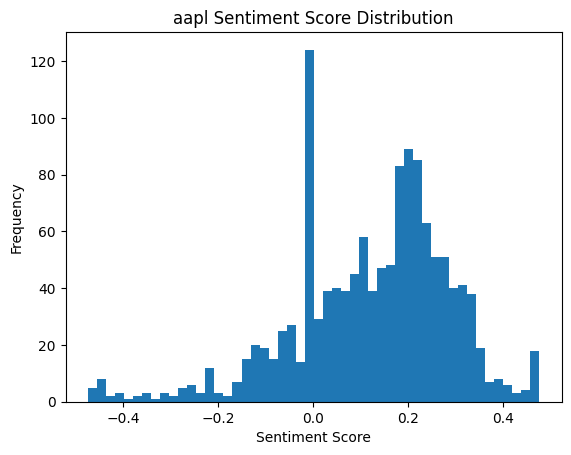

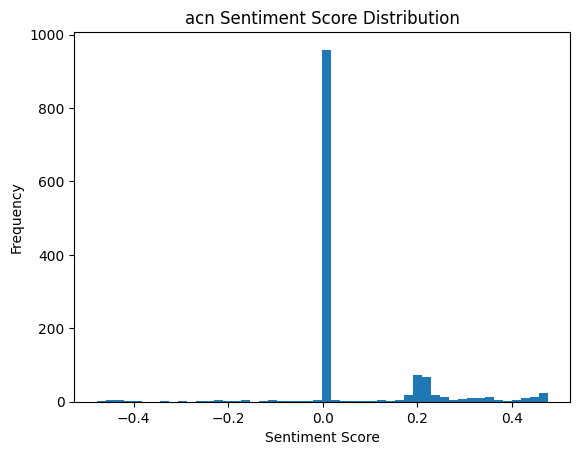

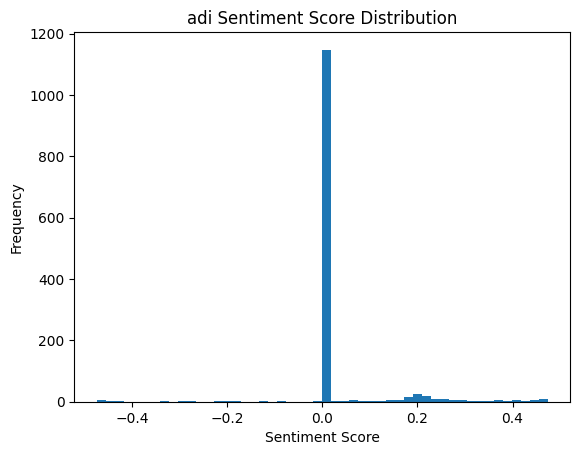

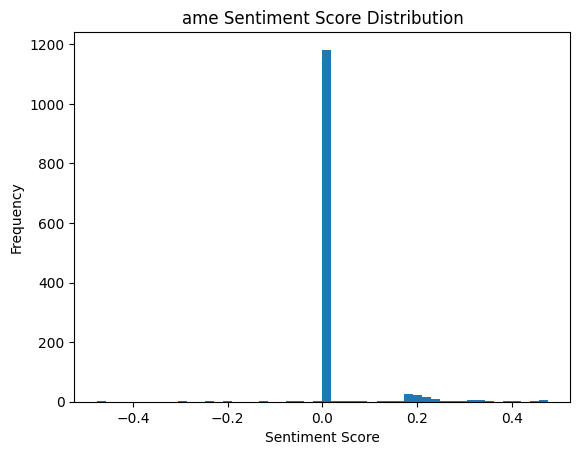

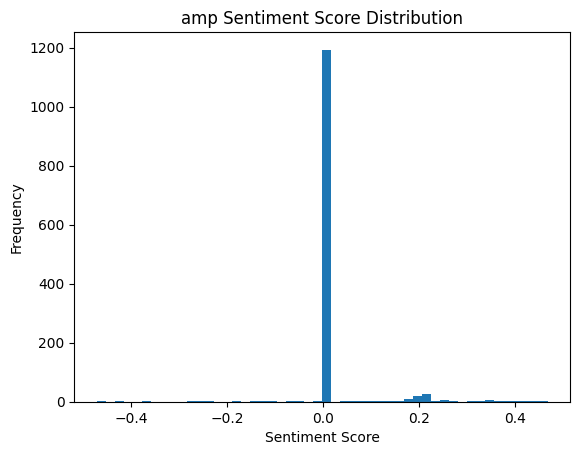

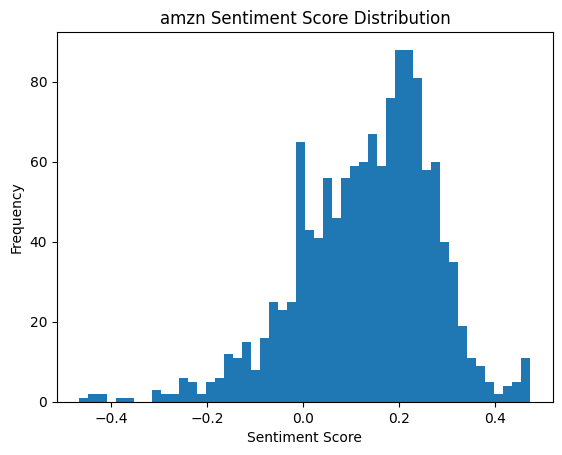

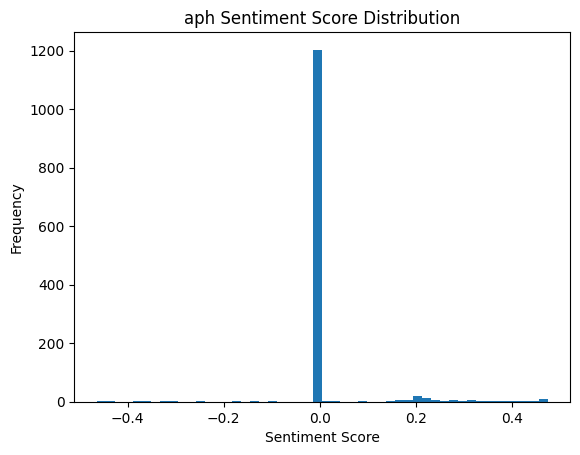

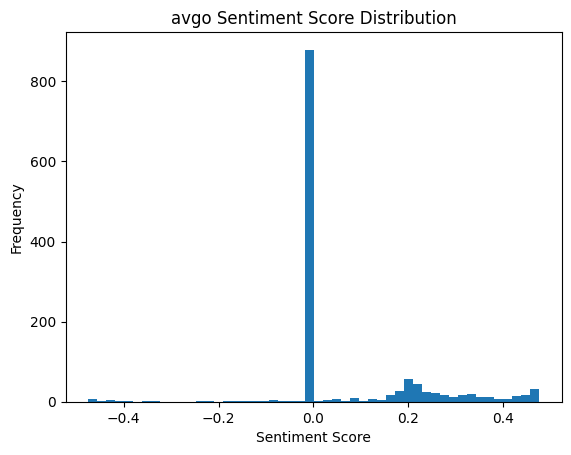

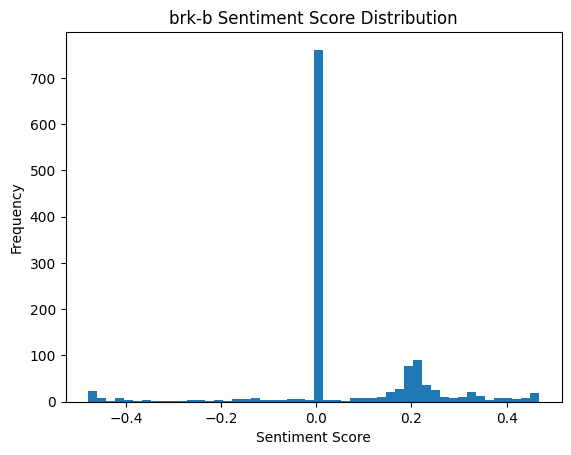

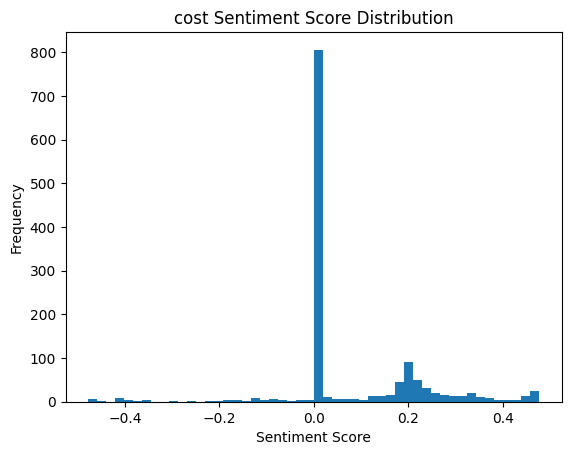

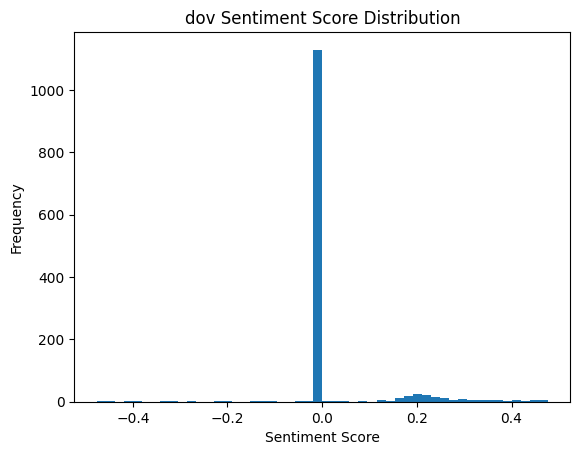

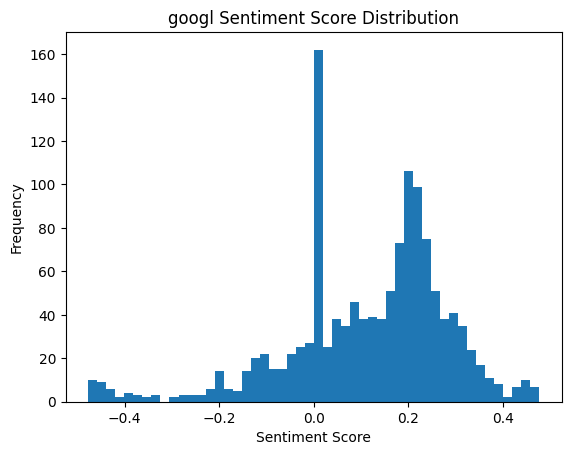

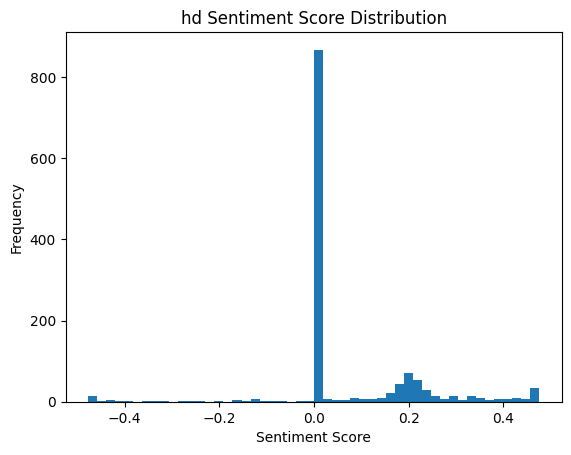

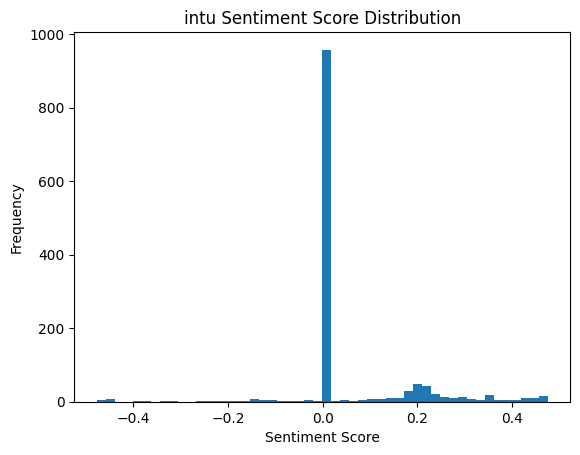

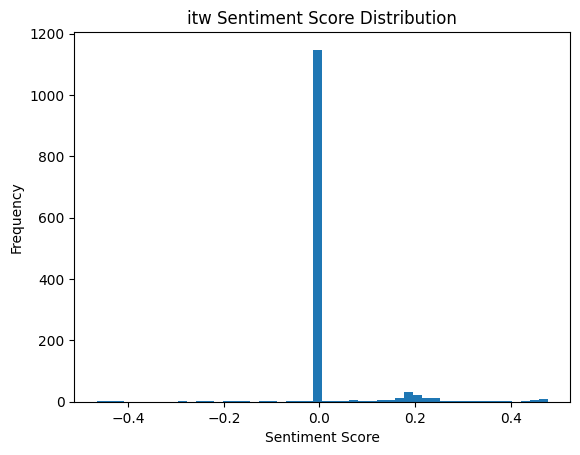

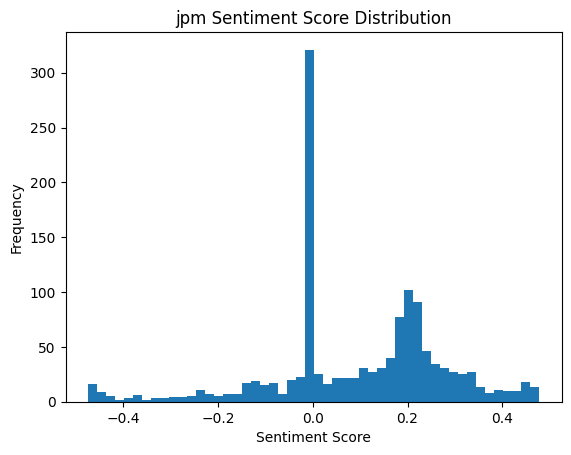

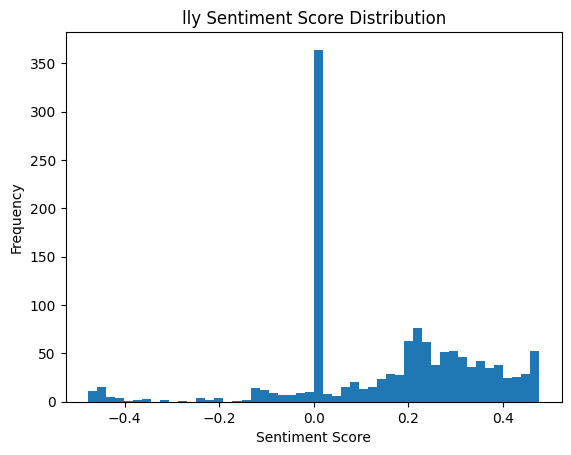

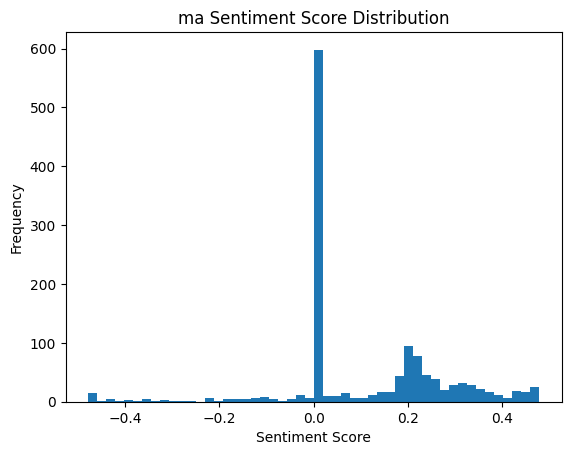

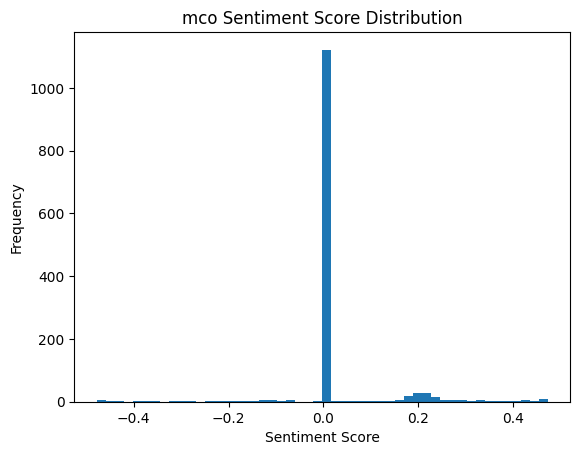

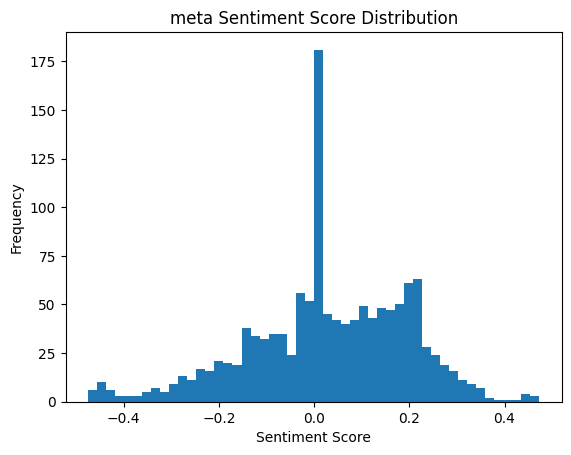

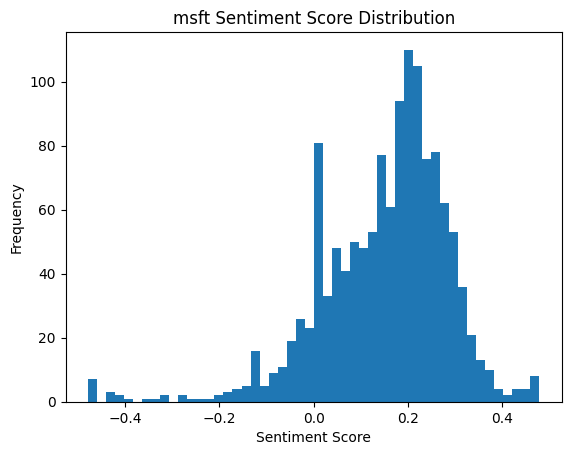

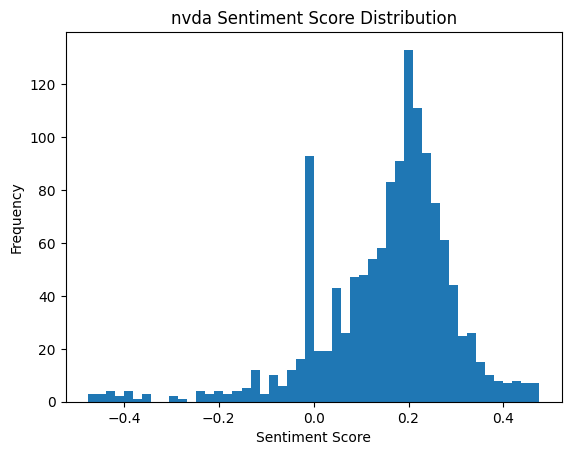

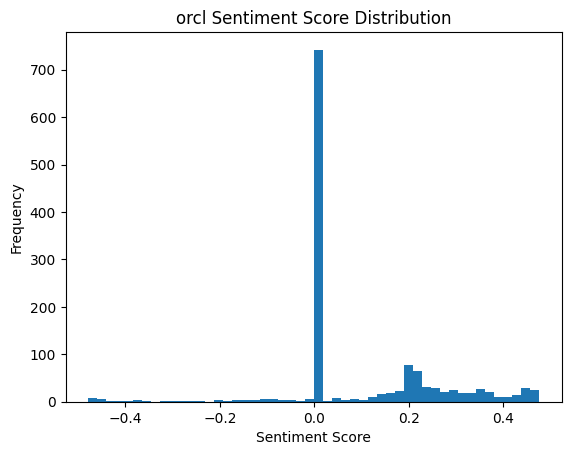

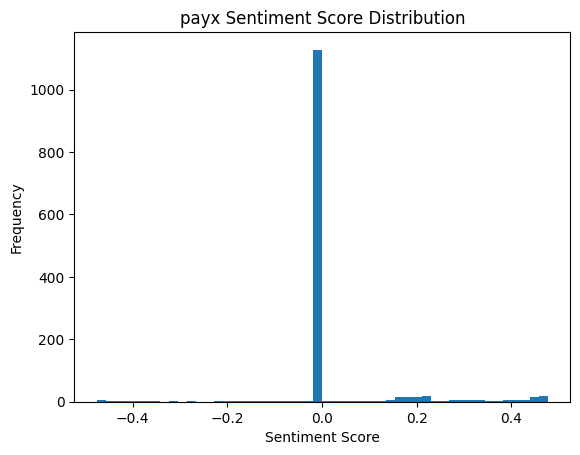

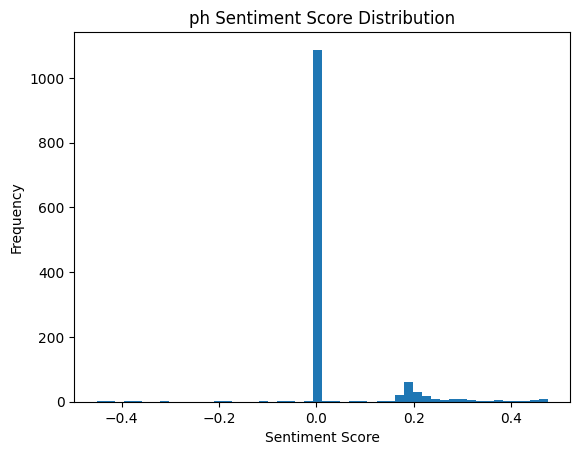

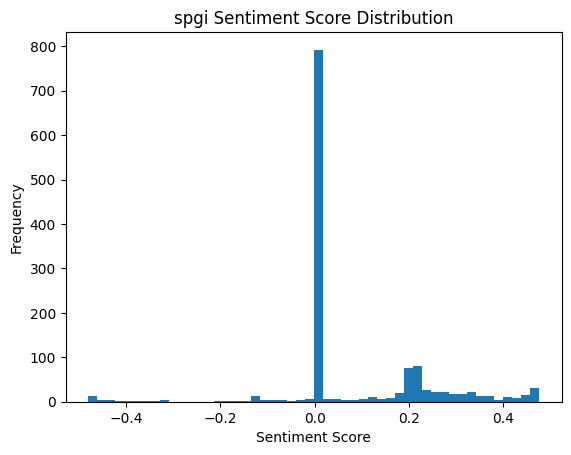

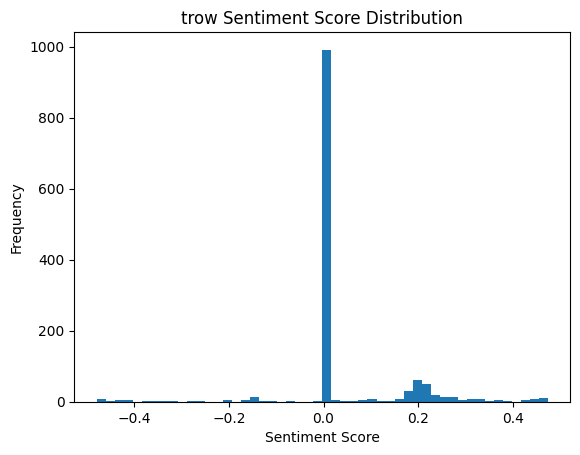

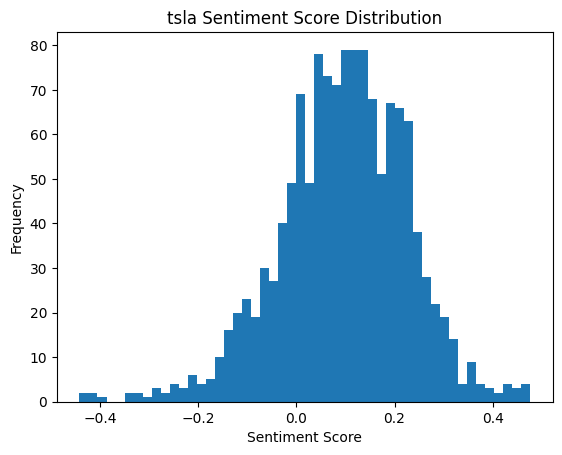

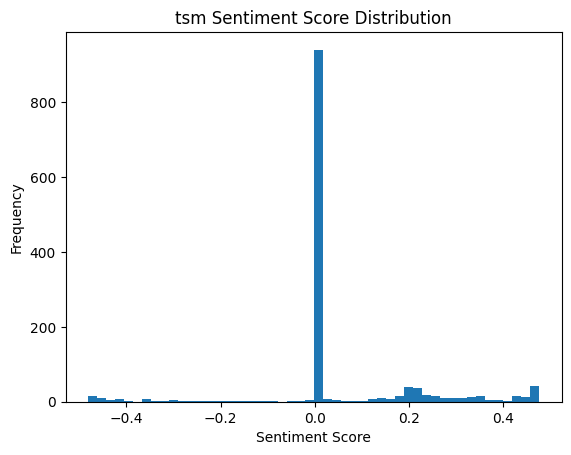

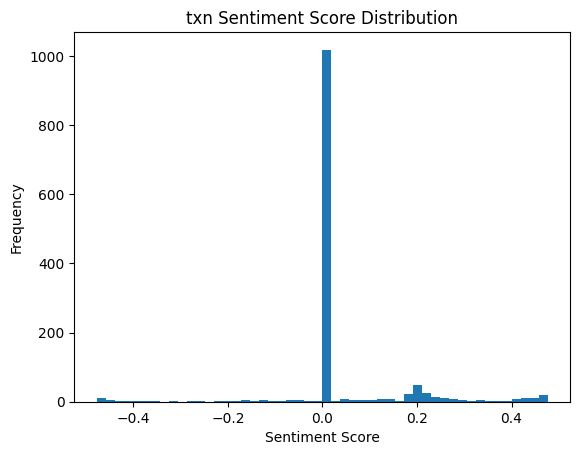

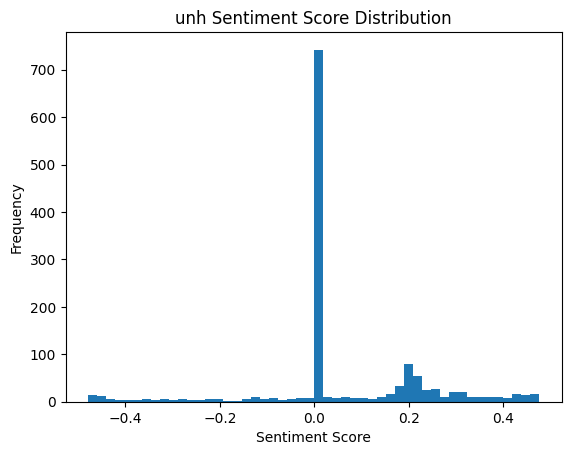

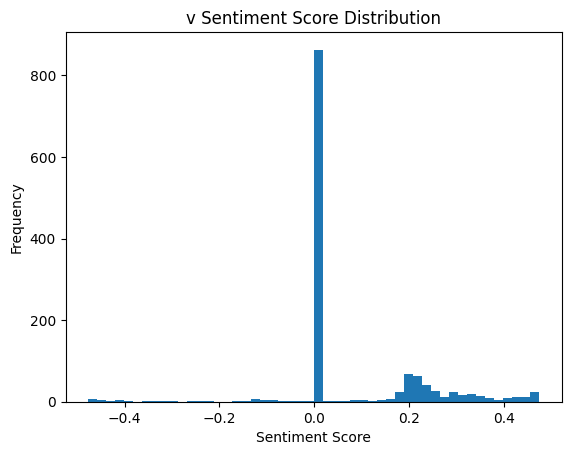

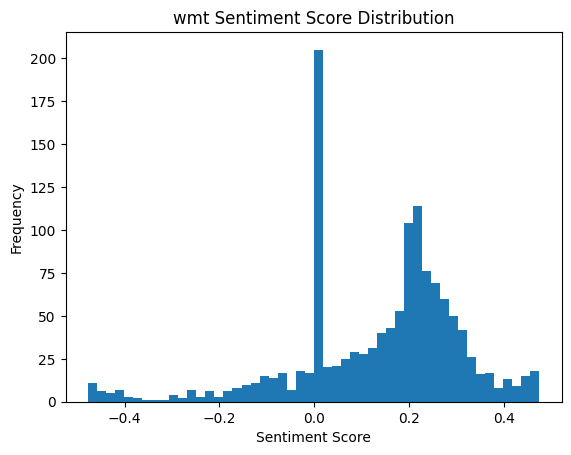

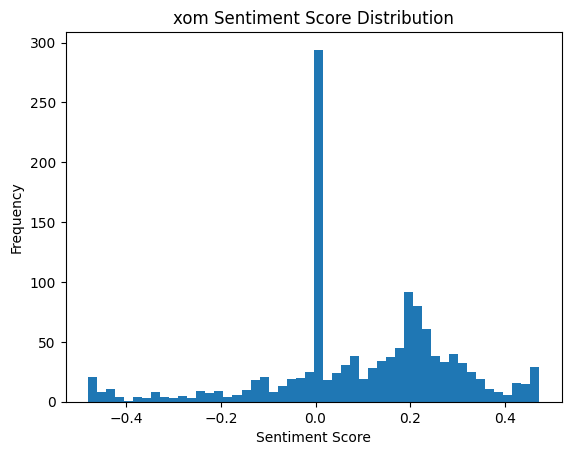

In [244]:
for ticker in df_pivot.columns[1:].to_list():
    df_pivot[ticker].plot(kind='hist', bins=50, title=f'{ticker} Sentiment Score Distribution')
    plt.xlabel('Sentiment Score')
    plt.show()

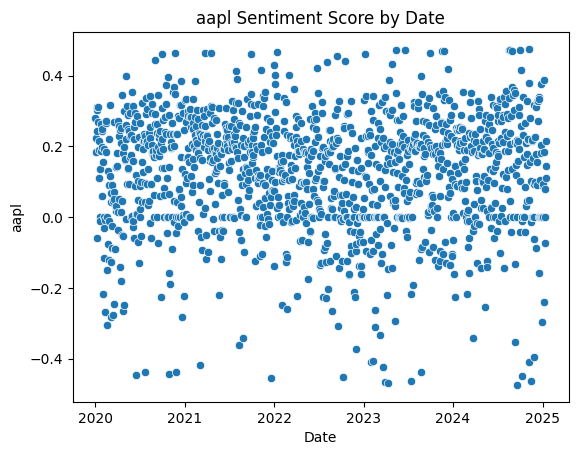

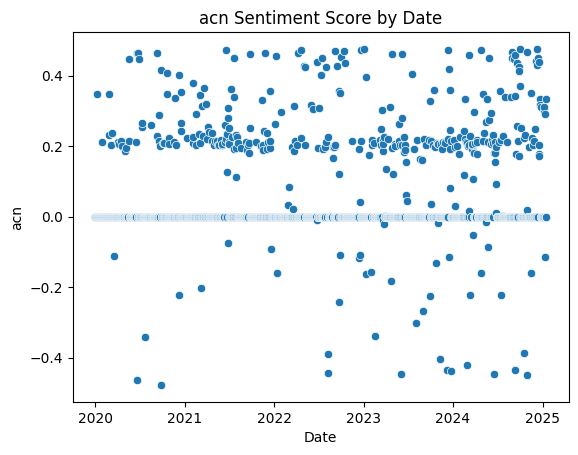

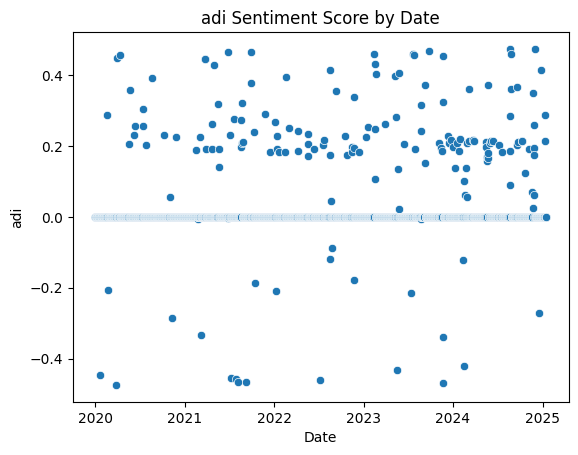

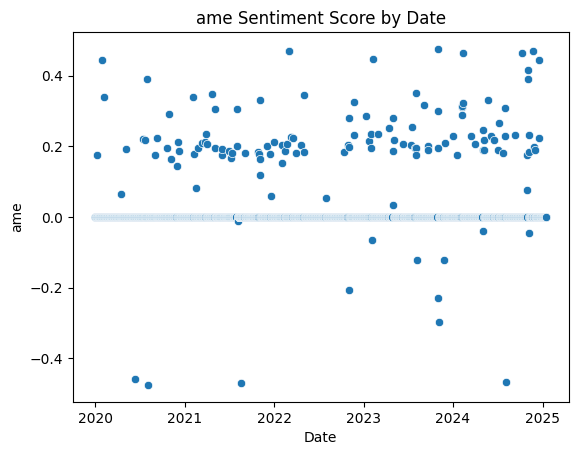

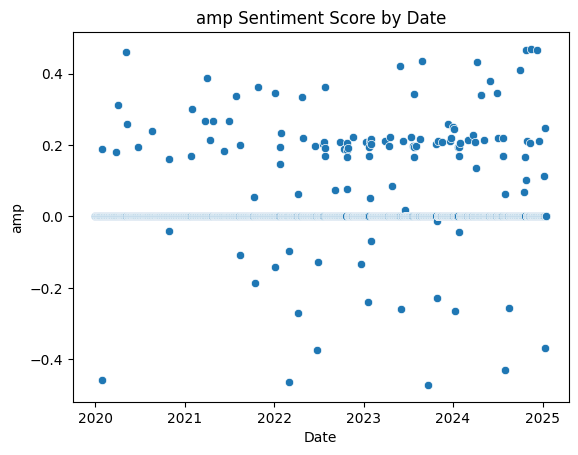

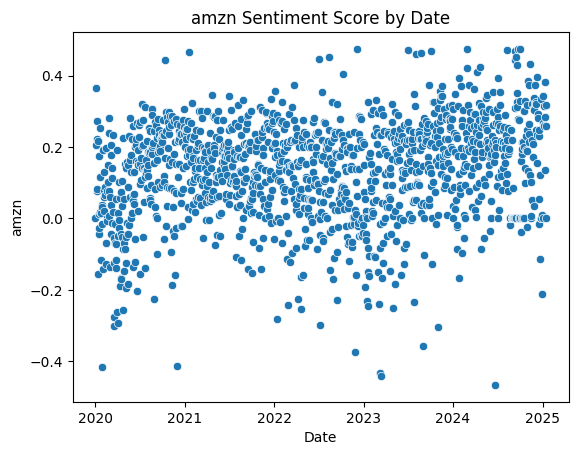

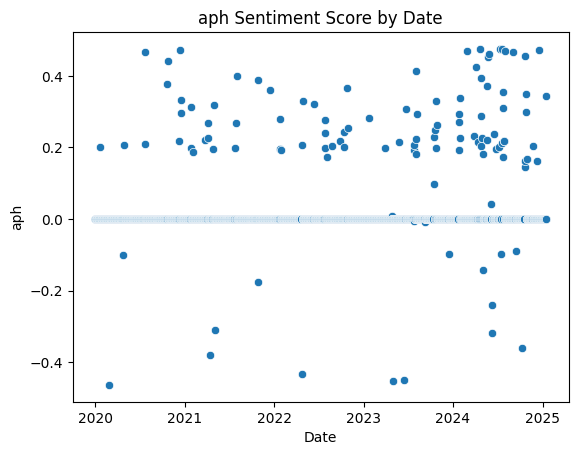

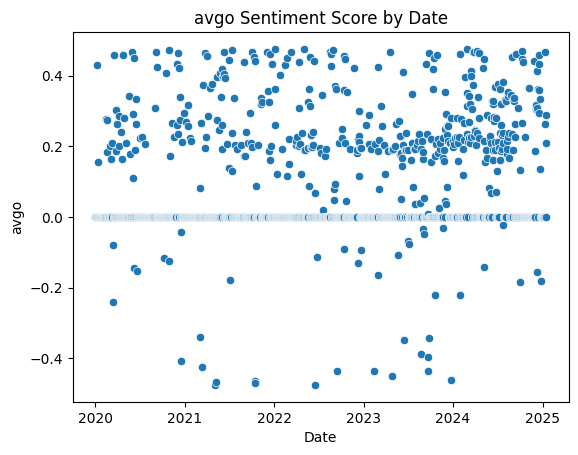

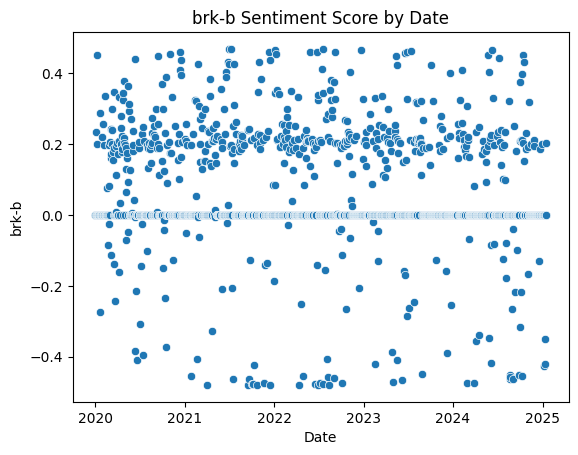

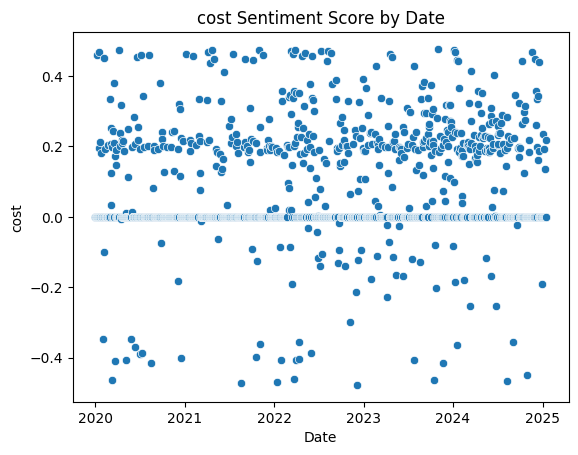

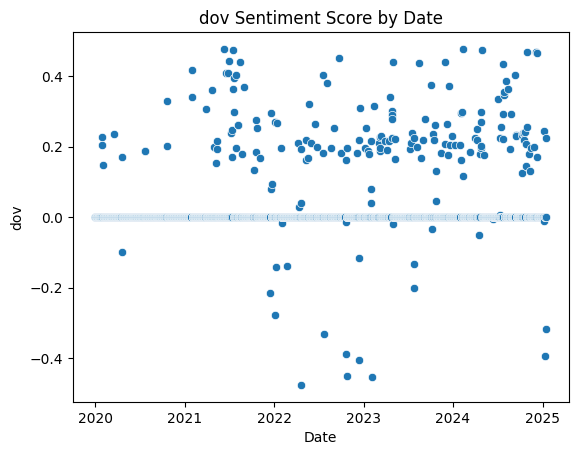

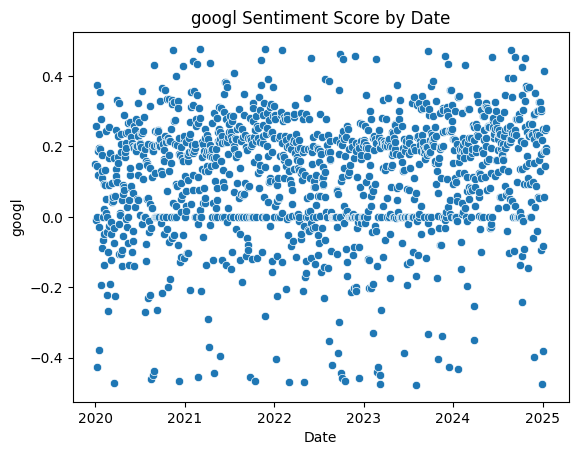

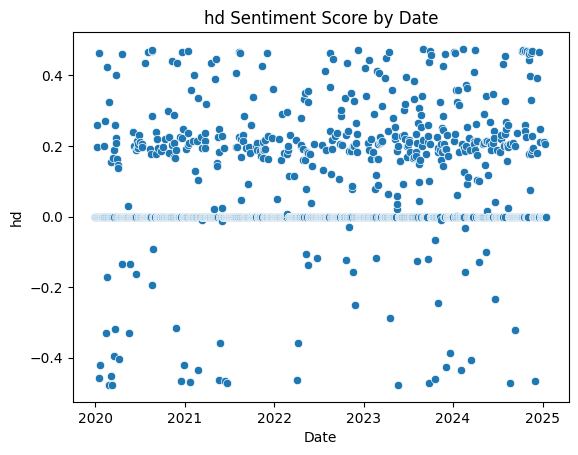

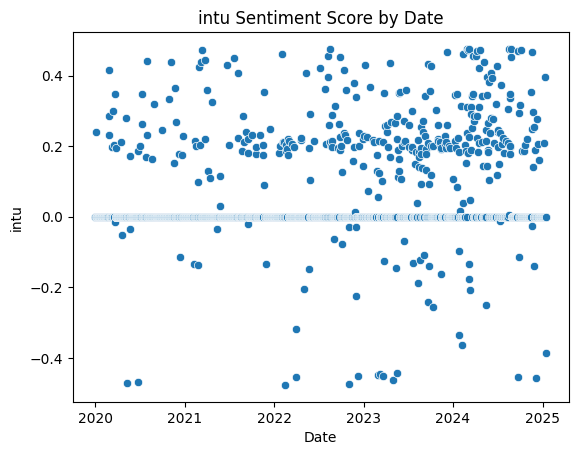

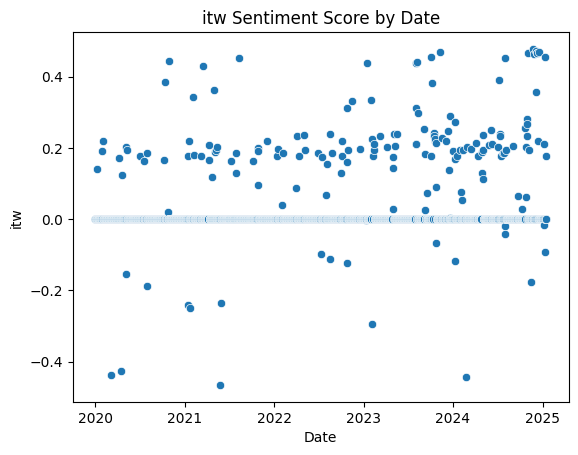

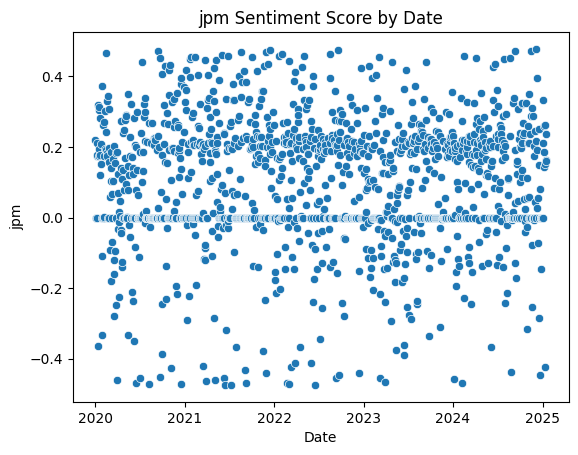

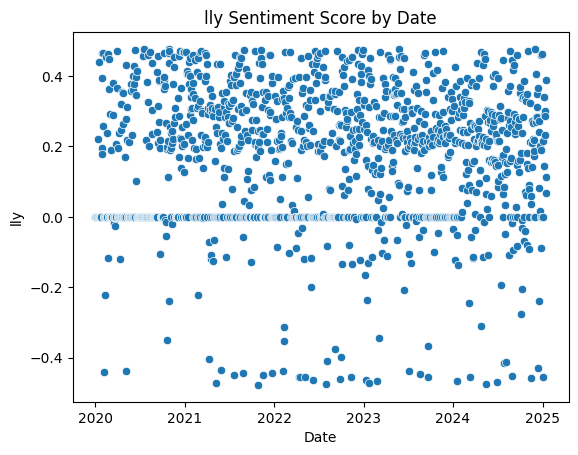

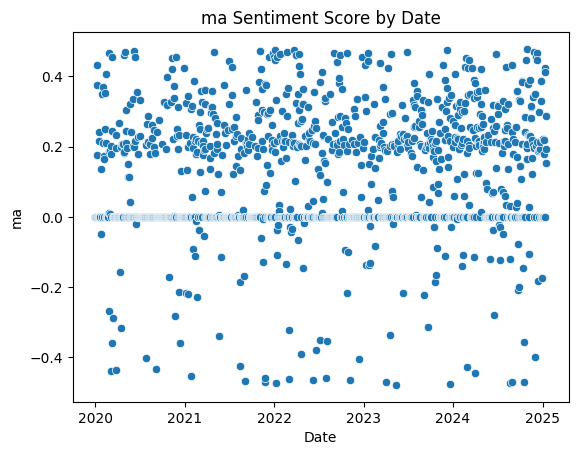

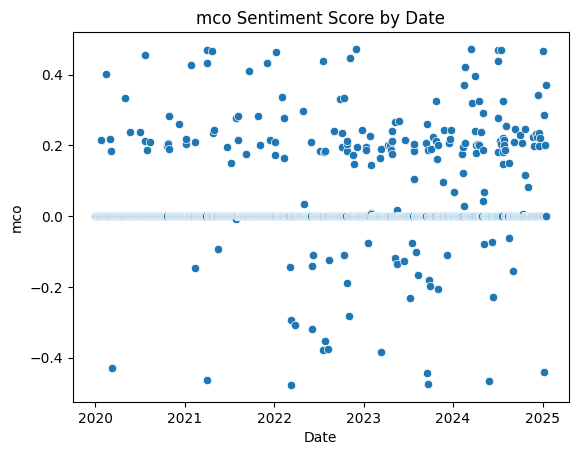

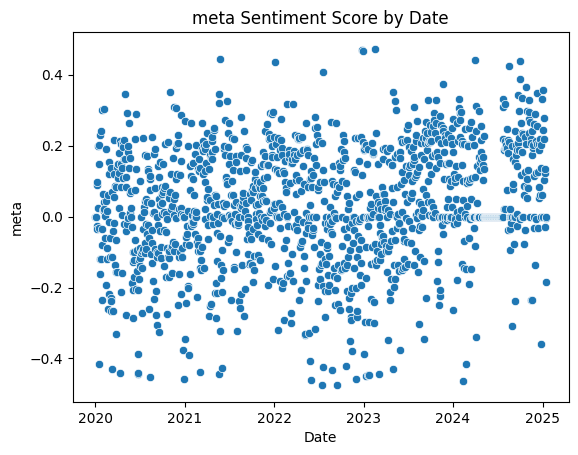

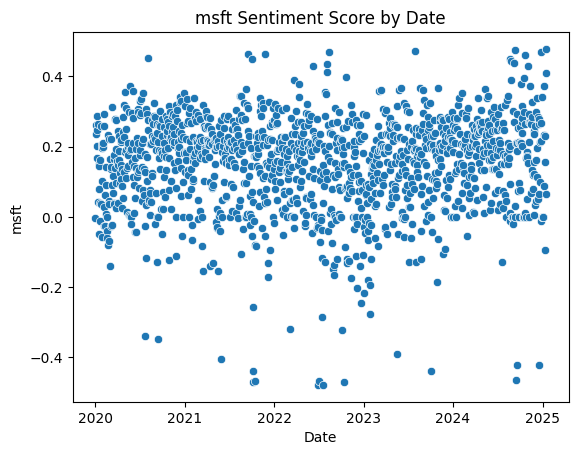

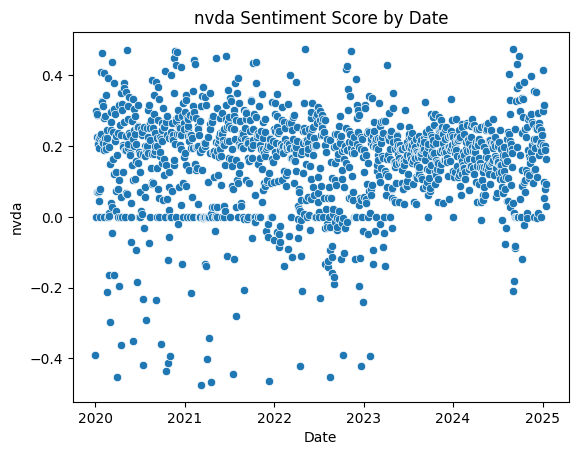

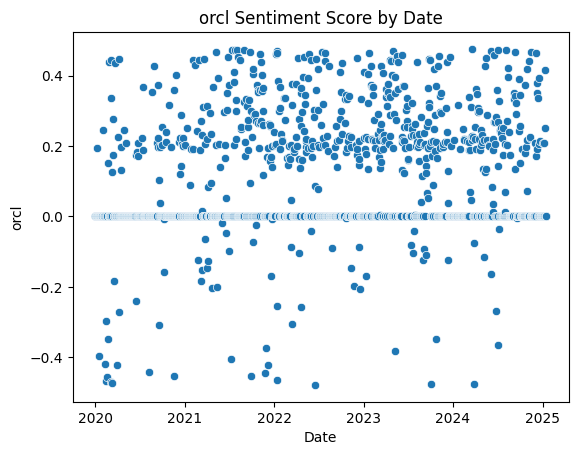

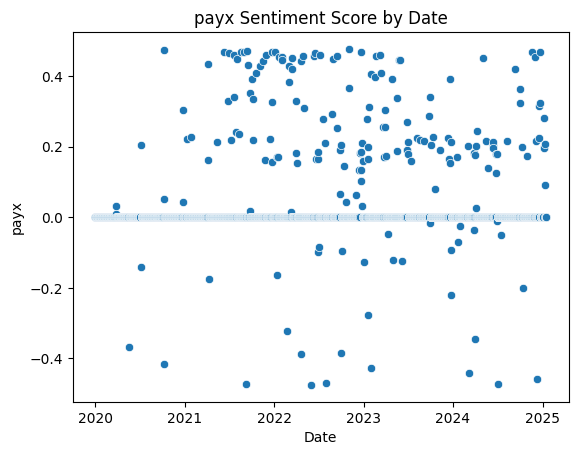

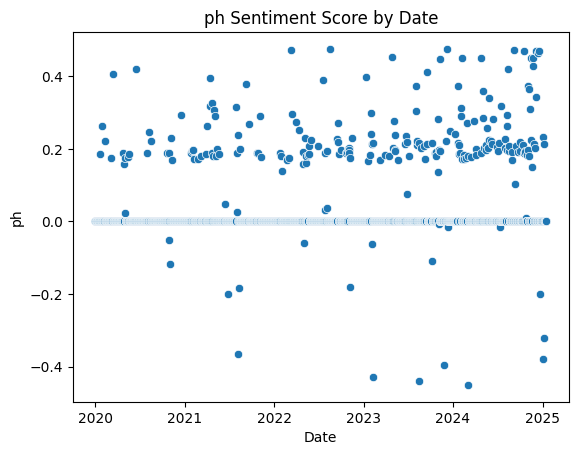

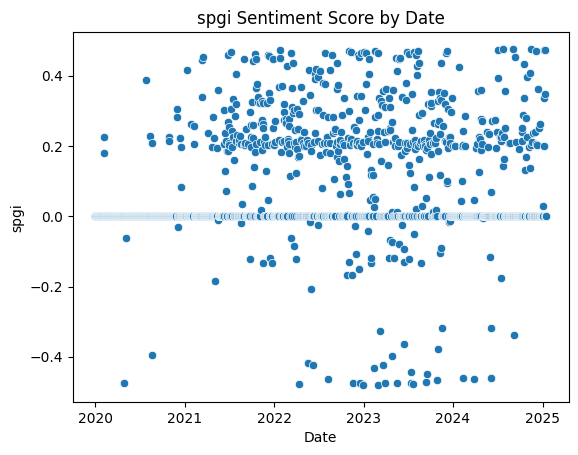

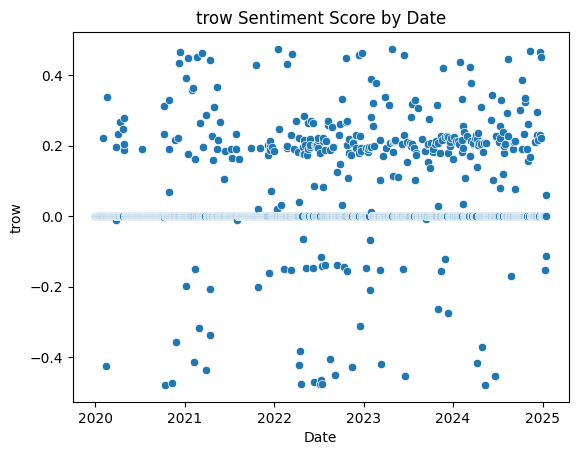

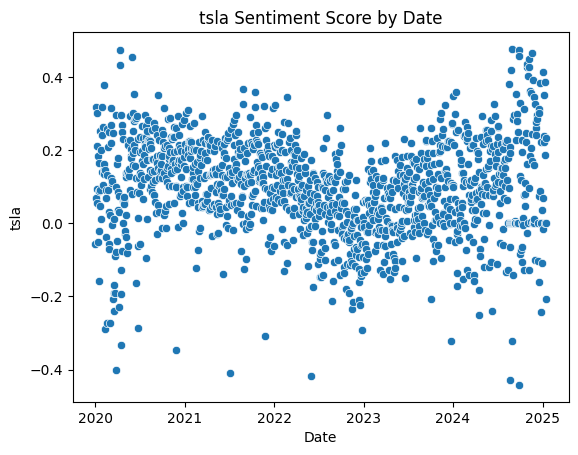

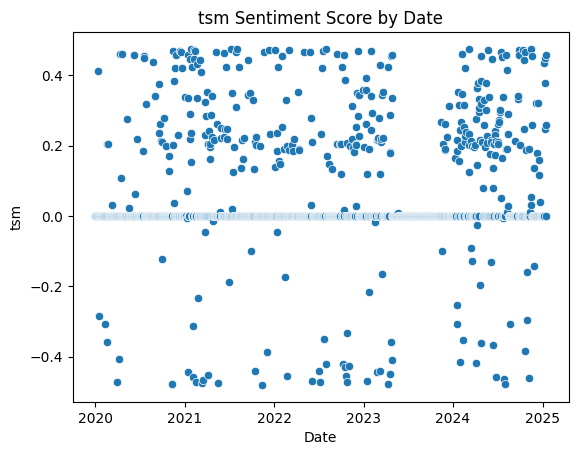

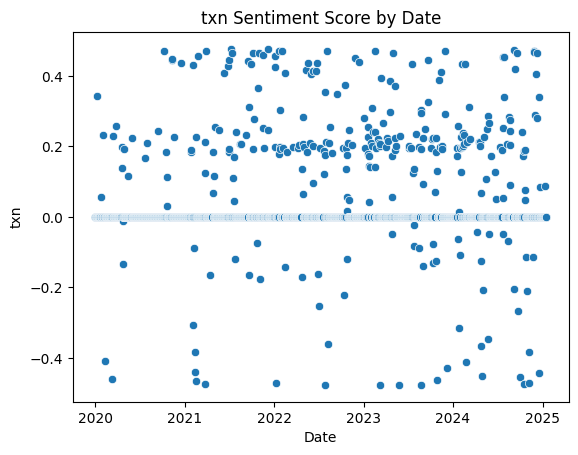

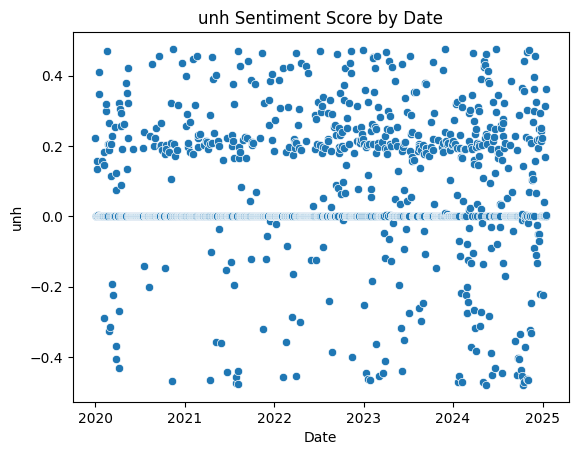

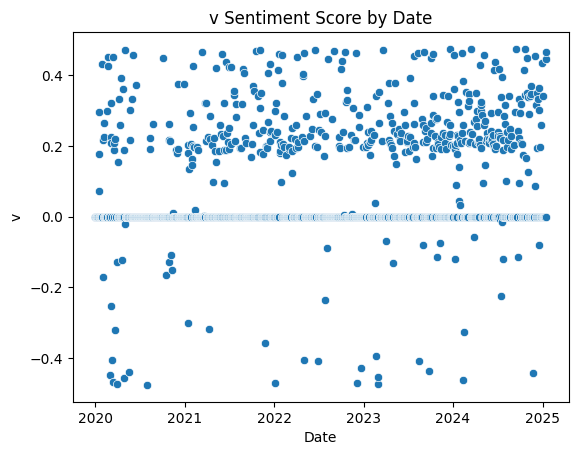

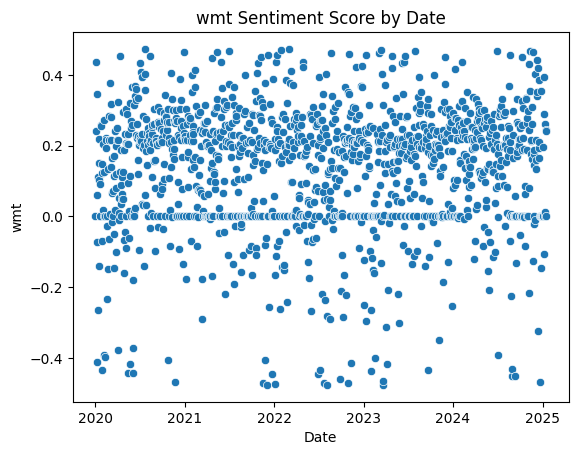

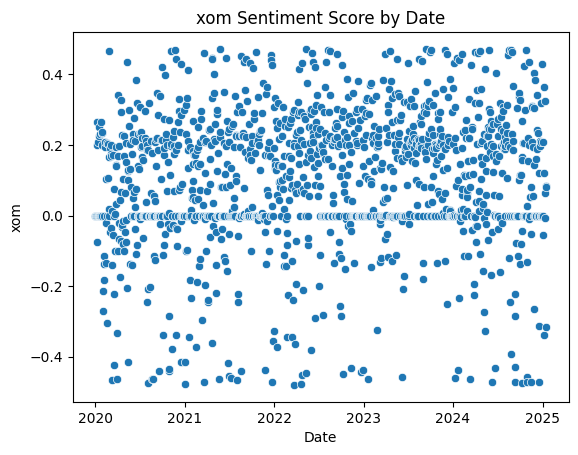

In [245]:
# lets create a scatterplot for the sentiment score of each ticker by date
import matplotlib.pyplot as plt
import seaborn as sns

for ticker in df_pivot.columns[1:].to_list():
    sns.scatterplot(data=df_pivot, x='Date', y=ticker)
    plt.title(f'{ticker} Sentiment Score by Date')
    plt.show()